# Image Classification - Rock, Paper, Scissors

This tutorial describes how to use the MLTK to develop a image classification machine learning model to detect the hand gestures:  
- __Rock__
- __Paper__
- __Scissors__
- __Unknown__

## Demo Video

The following is a video of the demo described in this tutorial:

<iframe width="800" height="500"
src="https://www.youtube.com/embed/hIfGOc9ST50" 
frameborder="0" 
allow="autoplay; encrypted-media;" 
allowfullscreen></iframe>

## Quick Links

- [GitHub Source](https://github.com/SiliconLabs/mltk/blob/master/mltk/tutorials/image_classification.ipynb) - View this tutorial on Github
- [Run on Colab](https://colab.research.google.com/github/siliconlabs/mltk/blob/master/mltk/tutorials/image_classification.ipynb) - Run this tutorial on Google Colab
- [Train in the "Cloud"](https://siliconlabs.github.io/mltk/mltk/tutorials/cloud_training_with_vast_ai.html) - _Vastly_ improve training times by training this model in the "cloud"
- [C++ Example Application](https://siliconlabs.github.io/mltk/docs/cpp_development/examples/image_classifier.html) - View this tutorial's associated C++ example application
- [Machine Learning Model](https://siliconlabs.github.io/mltk/docs/python_api/models/siliconlabs/rock_paper_scissors.html) - View this tutorial's associated machine learning model

## Overview

### Objectives

After completing this tutorial, you will have:
1. A better understanding of how image classification machine learning models work
2. A better understanding of how labeled datasets are created
3. All of the tools needed to develop your own image classification model
4. A working demo to detect the hand gestures: "Rock", "Paper", "Scissors"

### Content

This tutorial is divided into the following sections:
1. [Overview of classification machine learning models](#classification-machine-learning-models-overview)
2. [Creating a labeled dataset](#creating-a-labeled-dataset)
3. [Creating the model specification](#creating-the-model-specification)
4. [Note about model parameters](#model-parameters)
5. [Summarizing the model](#model-visualization)
6. [Visualizing the model graph](#model-visualization)
7. [Profiling the model](#model-profiler)
8. [Training the model](#model-training)
9. [Evaluating the model](#model-evaluation)
10. [Testing the model](#model-testing)
11. [Deploying the model to an embedded device](#deploying-the-model)

### Running this tutorial from a notebook

For documentation purposes, this tutorial was designed to run within a [Jupyter Notebook](https://jupyter.org). 
The notebook can either run locally on your PC _or_ on a remote server like [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb).  

- Refer to the [Notebook Examples Guide](https://siliconlabs.github.io/mltk/docs/guides/notebook_examples_guide.html) for more details
- Click here: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/siliconlabs/mltk/blob/master/mltk/tutorials/image_classification.ipynb) to run this tutorial interactively in your browser

__NOTE:__ Some of the following sections require this tutorial to be running locally with a supported embedded platform connected.

### Running this tutorial from the command-line

While this tutorial uses a [Jupyter Notebook](https://jupyter.org), 
the recommended approach is to use your favorite text editor and standard command terminal, no Jupyter Notebook required.  

See the [Standard Python Package Installation](https://siliconlabs.github.io/mltk/docs/installation.html#standard-python-package) guide for more details on how to enable the `mltk` command in your local terminal.

In this mode, when you encounter a `!mltk` command in this tutorial, the command should actually run in your local terminal (excluding the `!`)

## Required Hardware

Some parts of the tutorial requires a supported development board and the [ArduCAM](https://www.arducam.com/product/arducam-2mp-spi-camera-b0067-arduino) camera module.

See the [Hardware Setup](https://siliconlabs.github.io/mltk/docs/cpp_development/examples/image_classifier.html#hardware-setup) section of the Image Classification C++ example application for details on how to connect the camera to the development board. 

__NOTE:__ Only the camera needs to be connected to the development board. You do _not_ need to build the C++ application from source for this tutorial.

## Install MLTK Python Package

Before using the MLTK, it must first be installed.  
See the [Installation Guide](https://siliconlabs.github.io/mltk/docs/installation.html) for more details.

In [ ]:
!pip install --upgrade silabs-mltk

All MLTK modeling operations are accessible via the `mltk` command.  
Run the command `mltk --help` to ensure it is working.  
__NOTE:__ The exclamation point `!` tells the Notebook to run a shell command, it is not required in a [standard terminal](https://siliconlabs.github.io/mltk/docs/installation.html#standard-python-package)

In [1]:
!mltk --help

Usage: mltk [OPTIONS] COMMAND [ARGS]...

  Silicon Labs Machine Learning Toolkit

  This is a Python package with command-line utilities and scripts to aid the
  development of machine learning models for Silicon Lab's embedded platforms.

Options:
  --version         Display the version of this mltk package and exit
  --gpu / --no-gpu  Disable usage of the GPU. 
                    This does the same as defining the environment variable: CUDA_VISIBLE_DEVICES=-1
                    Example:
                    mltk --no-gpu train image_example1
  --help            Show this message and exit.

Commands:
  build               MLTK build commands
  classify_audio      Classify keywords/events detected in a microphone's...
  classify_image      Classify images detected by a camera connected to...
  commander           Silab's Commander Utility
  compile             Compile a model for the specified accelerator
  custom              Custom Model Operations
  evaluate            Evaluate a t

## Classification Machine Learning Models Overview

Before continuing with this tutorial, it is recommended to review the [MLTK Overview](https://siliconlabs.github.io/mltk/docs/overview.html), which provides an overview of the core concepts used by the this tutorial.

Image classification is one of the most important applications of deep learning and Artificial Intelligence. Image classification refers to assigning labels to images based on certain characteristics or features present in them. The algorithm identifies these features and uses them to differentiate between different images and assign labels to them [[1]](https://www.simplilearn.com/tutorials/deep-learning-tutorial/guide-to-building-powerful-keras-image-classification-models).


### Class IDs

In this tutorial, we have a dataset with four different image types, a.k.a. __classes__:  
- __rock__ - Images of a person's hand making a "rock" gesture
- __paper__ - Images of a person's hand making a "paper" gesture
- __scissors__ - Images of a persons's hand making a "scissors" gesture
- __unknown__ - Random images not containing any of the above

We assign an ID, a.k.a. __label__, 0-3, to each of these classes.  
We then "train" a machine learning model so that when we input an image from one of the classes is given to the model, the model's output is the corresponding class ID. In this way, at runtime on the embedded device when the camera captures an image of a person's hand, the ML model predicts its corresponding class ID which the firmware application uses accordingly. i.e.

![](https://github.com/SiliconLabs/mltk/raw/master/docs/img/rock_paper_scissors_overview.png)


### Convolution Neural Networks

The type of machine learning model used in this tutorial is Convolution Neural Network (CNN).

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other [[2]](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53). 

A typical CNN can be visualized as follows:

![](https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg)  
[Typical CNN Diagram](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

A typical CNN is comprised of multiple __layers__. A given layer is basically a mathematical operation that operates on multi-dimensional arrays (a.k.a tensors).
The layers of a CNN can be split into two core phases:  
- __Feature Learning__ - This uses Convolutional layers to extract "features" from the input image
- __Classification__ - This takes the flatten "feature vector" from the feature learning layers and uses "fully connected" layer(s) to make a prediction on which class the input image belongs

## Creating a Labeled Dataset

The most important part of a machine learning model is the dataset that was used to train the model.
For a machine learning model to work well in the field, it must be trained with a dataset this is __representative__ of what would be seen in the field.
Put another way, a machine learning model can only make accurate predictions on samples that are similar to what it has previously seen (i.e. trained with).
As such, approximately 80% of the effort of creating a robust machine learning model is generating the dataset.

Typically, a good dataset should have the following characteristics:  
- __Numerous samples per class__ - 1k+ -> ok, 10k+ -> good, 100k+ -> great
- __Mostly "balanced"__ - The sample count for each class should be mostly the same
- __Representative__ - There should be samples for all the possible orientations, lighting, backgrounds, etc. that could be seen in the field (the model can only make accurate predictions on stuff it has seen during training)
- __Non-redundant__ - Each of the samples should be relatively unique, duplicate samples usually doesn't make the model more robust
- __Correctly labeled__ - The samples in the dataset should be correctly labeled. A few mislabled samples is typically ok, but too many can degrade the model's accuracy
- __Uses same sensor as the one in the field__ - While not a hard requirement, it is usually best if the training dataset samples are generated using the same sensor as the one that will be used in the field. This way, the samples "look" the same during training as they do in the field


### Rock, Paper, Scissors Dataset Overview

This tutorial uses the [Rock, Paper, Scissors](https://siliconlabs.github.io/mltk/docs/python_api/datasets/index.html#rock-paper-scissors-v2) dataset.

You can import this dataset into a Python script using:

In [2]:
# Import the Rock, Paper, Scissors v2 dataset
from mltk.datasets.image import rock_paper_scissors_v2

# Then download and extract the archive
dataset_dir = rock_paper_scissors_v2.load_data()

print(f'Rock, Paper, Scissors dataset directory path: {dataset_dir}')

Extracting: C:/Users/reed/.mltk/downloads/rock_paper_scissors_v2.7z
to: C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2
(This may take awhile, please be patient ...)


patool: Extracting C:/Users/reed/.mltk/downloads/rock_paper_scissors_v2.7z ...
patool: running "C:\Program Files\7-Zip\7z.EXE" x -y -oE:/reed/mltk/tmp_archives/rock_paper_scissors_v2 -- C:/Users/reed/.mltk/downloads/rock_paper_scissors_v2.7z
patool: ... C:/Users/reed/.mltk/downloads/rock_paper_scissors_v2.7z extracted to `E:/reed/mltk/tmp_archives/rock_paper_scissors_v2'.
Rock, Paper, Scissors dataset directory path: C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2


This dataset has the following subdirectories:

In [5]:
import os 

# The dataset has the following sub-directories:
for sub_dir in os.listdir(dataset_dir):
    if os.path.isdir(f'{dataset_dir}/{sub_dir}'):
        print(sub_dir)

paper
rock
scissor
_unknown_


Each subdirectory represents a __class__.
So the "paper" subdirectory contains images of someone's hand making the "paper" gesture, and similar for the other subdirectories.

Each image file (a.k.a "sample") is a 96x96 grayscale JPEG image.

The following shows some of the samples in the dataset:

Class: paper, path: C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/paper


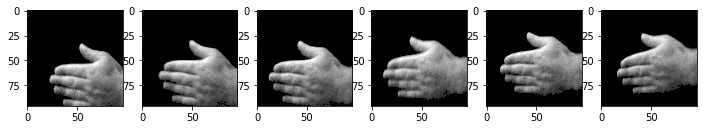

Class: rock, path: C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/rock


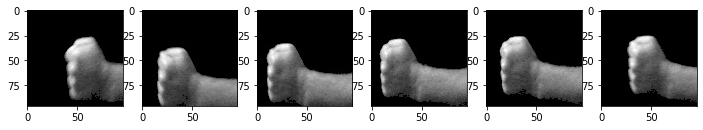

Class: scissor, path: C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/scissor


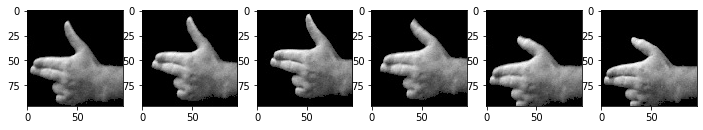

Class: _unknown_, path: C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/_unknown_


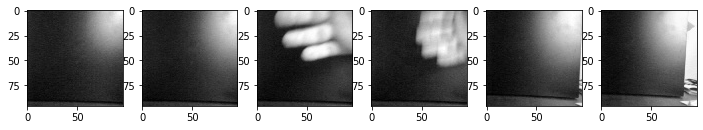

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Collect 5 samples file paths for each class in the dataset
class_samples = {}
for class_name in os.listdir(dataset_dir):
    class_dir = f'{dataset_dir}/{class_name}'
    if not os.path.isdir(class_dir):
        continue
    if class_name not in class_samples:
        class_samples[class_name] = []

    for sample_filename in os.listdir(class_dir):
        if len(class_samples[class_name]) > 5:
            # We only want 5 samples from each class
            break
        if not sample_filename.endswith('.jpg'):
            continue

        sample_path = f'{class_dir}/{sample_filename}'
        class_samples[class_name].append(sample_path)

# Display the class samples
for class_name, sample_paths in class_samples.items():
    class_dir = f'{dataset_dir}/{class_name}'
    print(f'Class: {class_name}, path: {class_dir}')
    _, axs = plt.subplots(1, 6, figsize=(12, 3))
    axs = axs.flatten()
    for sample_path, ax in zip(sample_paths, axs):
        img = mpimg.imread(sample_path)
        ax.imshow(img, cmap="gray")
    plt.show()

### Update the Dataset

Currently, the dataset contains less than 5k samples. This is quite small and will likely not produce a robust model.
The best way to make a robust model is it add more __representative__ samples to the dataset.

For this dataset, "representative" means:
- Different people's hands making each gesture
- Different lighting angles
- Different backgrounds
- Different distances from the camera
- Use of "left" and "right" hand
- Showing front and back of hand

So basically, to improve the model we need to increase the size of the dataset by having different people record their hands performing "rock", "paper", "scissors" from different orientations.
The more images we add, the more "representative" the dataset becomes, which should (hopefully) make the model more robust.

Fortunately, the MLTK features a command that allows for recording images from the embedded device.

In [19]:
!mltk classify_image --help

Usage: mltk classify_image [OPTIONS] <model>

  Classify images detected by a camera connected to an embedded device.

  NOTE: A supported embedded device must be locally connected to use this
  command.

Arguments:
  <model>  On of the following:
           - MLTK model name 
           - Path to .tflite file
           - Path to model archive file (.mltk.zip)
           NOTE: The model must have been previously trained for image classification  [required]

Options:
  -a, --accelerator <name>        Name of accelerator to use while executing the audio classification ML model
  --port <port>                   Serial COM port of a locally connected embedded device.
                                  'If omitted, then attempt to automatically determine the serial COM port
  -v, --verbose                   Enable verbose console logs
  -w, --window_duration <duration ms>
                                  Controls the smoothing. Drop all inference results that are older than <now> minus win

Using the command:

```
mltk rock_paper_scissors --dump-images --dump-threshold 0.01
```

Images from the embedded device will be saved to the local PC.
The images can then by copied into the "Rock, Paper, Scissors" dataset directory.

### Update Sequence

The process for updating (i.e. adding more samples to) the "Rock, Paper, Scissors" dataset is as follows:

__NOTE:__ A similar process can be used for other image based datasets

1. Purchase an [ArduCAM](https://www.arducam.com/product/arducam-2mp-spi-camera-b0067-arduino) camera module
2. Connect the ArduCAM to a supported development board as described in the [image_classifier](https://siliconlabs.github.io/mltk/docs/cpp_development/examples/image_classifier.html) example application
3. Issue the command: `mltk rock_paper_scissors --dump-images --dump-threshold 0.01`
4. Open the dump directory that is printed in the terminal 
   (which should be something like `~/.mltk/image_classifier_images/brd2601`), 
   you should see images being dumped to this directory.  
   __Ensure the background is a solid color__ (A _much_ larger dataset is required to use random backgrounds)
5. Make the "rock" gesture in front of the camera, and move your hand is various orientations and distances from the camera
6. Repeat step 4 showing the other side of your hand making the "rock" gesture  
   (if possible, also change the lighting conditions to collect even more samples)
7. Once enough images have been dumped (~100-200), review the images in the dump directory.  
   Delete all images that do not clearly show your hand making the "rock" gesture
8. Once the dump directory only contains images of your hand making the "rock" gesture, copy all of the images to the dataset directory: `~/.mltk/datasets/rock_paper_scissors/v2/rock`
9.  Repeat steps 5-8 using the "paper" gesture and then the "scissors" gesture

Once this process is complete, the model should be retrained.e.g.: `mltk train rock_paper_scissors --clean` which will use the updated dataset.

## Creating the Model Specification

The model specification is a standard Python script containing everything needed to build, train, and evaluate a machine learning model in the MLTK.

Refer to the [Model Specification Guide](https://siliconlabs.github.io/mltk/docs/guides/model_specification.html) for more details about this file.

The completed model specification used for this tutorial may be found on Github: [rock_paper_scissors.py](https://github.com/siliconlabs/mltk/blob/master/mltk/models/siliconlabs/rock_paper_scissors.py).  

The following sub-sections describe how to create this model specification from scratch.

### Create the specification script

From your favorite text editor, create a model specification Python script file, e.g: 
`my_rock_paper_scissors.py`

The name of this file is the name given to the model. So all subsequent `mltk` commands will use the model name `my_rock_paper_scissors`, e.g:

```shell
mltk train my_rock_paper_scissors
```
You may use any name as long as it contains alphanumeric or underscore characters.

When executing a command, the MLTK searches for the model specification script by model name.   
The MLTK commands search the current working directory then any configured paths.  
Refer to the [Model Search Path Guide](https://siliconlabs.github.io/mltk/docs/guides/model_search_path.html) for more details.

__NOTE:__ The commands below use the pre-defined model name: `rock_paper_scissors`, however, you should replace that with your model's name, e.g.: `my_rock_paper_scissors`.

### Add necessary imports

Next, open the newly created Python script: `my_rock_paper_scissors.py`  
in your favorite text editor and add the following to the top of the model specification script:

In [ ]:
# Bring in the required Keras classes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from mltk.core.model import (
    MltkModel,
    TrainMixin,
    ImageDatasetMixin,
    EvaluateClassifierMixin
)

# By default, we use the ParallelImageDataGenerator
# We could use the Keras ImageDataGenerator but it is slower
from mltk.core.preprocess.image.parallel_generator import ParallelImageDataGenerator
#from keras.preprocessing.image import ImageDataGenerator
# Import the dataset
from mltk.datasets.image import rock_paper_scissors_v2

These import various Tensorflow and MLTK packages we'll use throughout the script.  
Refer to the comments above each import for more details.

### Define Model Object

Next, add the following to the model specification script:

In [ ]:
# Instantiate the MltkModel object with the following 'mixins':
# - TrainMixin            - Provides classifier model training operations and settings
# - ImageDatasetMixin     - Provides image data generation operations and settings
# - EvaluateClassifierMixin         - Provides classifier evaluation operations and settings
# @mltk_model # NOTE: This tag is required for this model be discoverable
class MyModel(
    MltkModel, 
    TrainMixin, 
    ImageDatasetMixin, 
    EvaluateClassifierMixin
):
    pass
my_model = MyModel()

This defines and instantiates a custom MltkModel object with several model "mixins".  

The custom model object must inherit the [MltkModel](https://siliconlabs.github.io/mltk/docs/python_api/mltk_model/index.html) object.  
Additionally, it inherits:
- [TrainMixin](https://siliconlabs.github.io/mltk/docs/python_api/mltk_model/train_mixin.html) so that we can train the model
- [ImageDatasetMixin](https://siliconlabs.github.io/mltk/docs/python_api/mltk_model/image_dataset_mixin.html) so that we can train the model with the [ParallelImageDataGenerator](https://siliconlabs.github.io/mltk/docs/python_api/data_preprocessing/image_data_generator.html)
- [EvaluateClassifierMixin](https://siliconlabs.github.io/mltk/docs/python_api/mltk_model/evaluate_classifier_mixin.html) so that we can evaluate the trained model

The rest of the model specification script configures the various properties of our custom model object.

### Configure the general model settings

In [ ]:
# For better tracking, the version should be incremented any time a non-trivial change is made
# NOTE: The version is optional and not used directly used by the MLTK
my_model.version = 1
# Provide a brief description about what this model models
# This description goes in the "description" field of the .tflite model file
my_model.description = 'Image classifier example for detecting Rock/Paper/Scissors hand gestures in images'

### Configure the basic training settings

Refer to the [TrainMixin](https://siliconlabs.github.io/mltk/docs/python_api/mltk_model/train_mixin.html) for more details about each property.

In [ ]:
# This specifies the number of times we run the training
# samples through the model to update the model weights.
# Typically, a larger value leads to better accuracy at the expense of training time.
# Set to -1 to use the early_stopping callback and let the scripts
# determine how many epochs to train for (see below).
# Otherwise set this to a specific value (typically 40-200)
my_model.epochs = 125
# Specify how many samples to pass through the model
# before updating the training gradients.
# Typical values are 10-64
# NOTE: Larger values require more memory and may not fit on your GPU
my_model.batch_size = 32
# This specifies the algorithm used to update the model gradients
# during training. Adam is very common
# See https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
my_model.optimizer = 'adam'
# List of metrics to be evaluated by the model during training and testing
my_model.metrics = ['accuracy']
# The "loss" function used to update the weights
# This is a classification problem with more than two labels so we use categorical_crossentropy
# See https://www.tensorflow.org/api_docs/python/tf/keras/losses
my_model.loss = 'categorical_crossentropy'

### Configure the training callbacks

Refer to the [TrainMixin](https://siliconlabs.github.io/mltk/docs/python_api/mltk_model/train_mixin.html) for more details about each property.

In [ ]:
# Generate checkpoints every time the validation accuracy improves
# See https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
my_model.checkpoint['monitor'] =  'val_accuracy'

# https://keras.io/api/callbacks/reduce_lr_on_plateau/
# If the test loss doesn't improve after 'patience' epochs 
# then decrease the learning rate by 'factor'
my_model.reduce_lr_on_plateau = dict(
  monitor='loss',
  factor = 0.95,
  min_delta=0.001,
  patience = 1
)

# If the  accuracy doesn't improve after 35 epochs then stop training
# https://keras.io/api/callbacks/early_stopping/
my_model.early_stopping = dict( 
  monitor = 'accuracy',
  patience = 25,
  verbose=1
)

### Configure the TF-Lite Converter settings

The [Tensorflow-Lite Converter](https://www.tensorflow.org/lite/convert) is used to "quantize" the model.  
The quantized model is what is eventually programmed to the embedded device.

Refer to the [Model Quantization Guide](https://siliconlabs.github.io/mltk/docs/guides/model_quantization.html) for more details.

In [ ]:
my_model.tflite_converter['optimizations'] = ['DEFAULT']
# Tell the TfliteConverter to generated int8 weights/filters
my_model.tflite_converter['supported_ops'] = ['TFLITE_BUILTINS_INT8']
# We want the input/output model data types to be float32
# since we're using samplewise_std_normalization=True during training
# With this, the TfliteConverter will automatically add quantize/dequantize
# layers to the model to automatically convert the float32 data to int8
my_model.tflite_converter['inference_input_type'] = 'float32'
my_model.tflite_converter['inference_output_type'] = 'float32'
# Generate a representative dataset from the validation data
my_model.tflite_converter['representative_dataset'] = 'generate'

### Configure the dataset settings

Next, we specify the dataset. In this tutorial we use the [Rock Paper Scissors v2](https://siliconlabs.github.io/mltk/docs/python_api/datasets/index.html#rock-paper-scissors-v2) dataset which comes as an MLTK package.

__NOTE:__ While the MLTK comes with pre-defined datasets, any external dataset may also be specified.  
Refer to the [ImageDatasetMixin.dataset](https://siliconlabs.github.io/mltk/docs/python_api/mltk_model/image_dataset_mixin.html) property for more details.

__NOTE:__ While a dataset path can be hard coded, it is _strongly_ recommended that the script dynamically downloads the dataset from the internet. This allows for the model training and evaluating to be reproducible. It also enables remote training on cloud services like [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb) which need to download the dataset any time a virtual instance is created.

In [ ]:
# The directory of the training data
# NOTE: This can also be a directory path or a callback function
my_model.dataset = rock_paper_scissors_v2
# The classification type
my_model.class_mode = 'categorical'
# The class labels found in your training dataset directory
my_model.classes = rock_paper_scissors_v2.CLASSES
# The input shape to the model. The dataset samples will be resized if necessary
my_model.input_shape = (84,84,1)
# Shuffle the dataset directory once
my_model.shuffle_dataset_enabled = True
# The numbers of samples for each class is different
# Then ensures each class contributes equally to training the model
my_model.class_weights = 'balanced'

### Configure the data augmentation settings

Next, we configure how we want to augment the dataset during training.  
See the [ParallelImageDataGenerator](https://siliconlabs.github.io/mltk/docs/python_api/data_preprocessing/image_data_generator.html) API doc for more details.

With these settings, random augmentations are done to the training subset samples during training.
This effectively increases the size of the dataset.

In [ ]:
my_model.datagen = ParallelImageDataGenerator(
    cores=0.65,
    debug=False,
    max_batches_pending=32, 
    validation_split= 0.15,
    validation_augmentation_enabled=False,
    rotation_range=15,
    width_shift_range=5,
    height_shift_range=5,
    brightness_range=(0.80, 1.10),
    contrast_range=(0.80, 1.10),
    noise=['gauss', 'poisson', 's&p'],
    zoom_range=(0.95, 1.05),
    rescale=None,
    horizontal_flip=True,
    vertical_flip=True,
    samplewise_center=True, # These settings require the model input to be float32
                            # NOTE: With these settings, the embedded device must also convert the images at runtime
    samplewise_std_normalization=True,
)

### Data preprocessing

The [ParallelImageDataGenerator](https://siliconlabs.github.io/mltk/docs/python_api/data_preprocessing/image_data_generator.html) also features some data preprocessing settings:

```
samplewise_center=True
samplewise_std_normalization=True
```

This normalizes the input images using:

```
norm_img = (img - mean(img)) / std(img)
```

This helps to ensure the model is not as dependent on camera and lighting variations.

Alternatively, you could use:

```
rescale=1/255.
```
To scale each pixel between 0-1. This helps the model converge faster during training.

Either way, any preprocessing that is done during training must also be done at runtime on the embedded device.

The [image_classifier](https://siliconlabs.github.io/mltk/docs/cpp_development/examples/image_classifier.html) example application demonstrates how to do these image preprocessing algorithms.

### Define the model layout

This defines the actual structure of the model that runs on the embedded device using the [Keras API](https://keras.io/about).
The details of how to create the model structure are out-of-scope for this tutorial.

The model used by this tutorial was taken from: [Building powerful image classification models using very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

In [ ]:
# Build the ML Model
# This model was adapted from:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
#
# This defines the actual model layout using the Keras API.
# This particular model is a relatively standard
# sequential Convolution Neural Network (CNN).
#
# It is important to the note the usage of the 
# "model" argument.
# Rather than hardcode values, the model is
# used to build the model, e.g.:
# Dense(model.n_classes)
#
# This way, the various model properties above can be modified
# without having to re-write this section.
def my_model_builder(model: MyModel):
    keras_model = Sequential()

    # Increasing this value can increase model accuracy 
    # at the expense of more RAM and execution latency
    filter_count = 16 

    # "Feature Learning" layers 
    keras_model.add(Conv2D(filter_count, (3, 3), input_shape=model.input_shape))
    keras_model.add(Activation('relu'))
    keras_model.add(MaxPooling2D(pool_size=(2, 2)))

    keras_model.add(Conv2D(filter_count, (3, 3)))
    keras_model.add(Activation('relu'))
    keras_model.add(MaxPooling2D(pool_size=(2, 2)))

    keras_model.add(Conv2D(filter_count*2, (3, 3)))
    keras_model.add(Activation('relu'))
    keras_model.add(MaxPooling2D(pool_size=(2, 2)))

    # "Classification" layers
    keras_model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    keras_model.add(Dense(filter_count*2)) # This should be the same size at the previous Conv2D layer count
    keras_model.add(Activation('relu'))
    keras_model.add(Dropout(0.5))
    keras_model.add(Dense(model.n_classes, activation='softmax'))

    keras_model.compile(
        loss=model.loss, 
        optimizer=model.optimizer, 
        metrics=model.metrics
    )

    return keras_model

At this point, the model specification script should have everything needed to train, evaluate, and generate model file that can run on an embedded device.  
The following sections describe how to use the MLTK to perform these tasks.

## Model Parameters

It is extremely important that whatever transforms are done to the dataset during training are also done at run-time on the embedded device.

To help with this, the MLTK allows for embedding parameters into the generated `.tflite` model file.

Refer to the [Model Parameters Guide](https://siliconlabs.github.io/mltk/docs/guides/model_parameters.html) for more details about how this works.

This is useful for this tutorial as the MLTK will automatically embed [ImageDatasetMixin](https://siliconlabs.github.io/mltk/docs/guides/model_parameters.html#imagedatasetmixin) parameters into the generated `.tflite` model file.
Later, the Gecko SDK will read the settings from the `.tflite` model file when generating the project. 

__NOTE:__ The `mltk summarize --tflite` command prints all the parameters that are embedded into the `.tflite` model file.

## Model Summary

With the model specification complete, it is sometimes useful to generate a summary of the model before we spend the time to train it.  
This can be done using the `summarize` command.

If you're using a local terminal, navigate to the same directory are your model specification script, e.g. `my_rock_paper_scissors.py` and modify the commands to use `my_rock_paper_scissors` or whatever you called your model.

__NOTE:__ Since we have not trained our model yet, we must add the `--build` option to the command.  
Once the model is trained, this option is not required.

In [20]:
# Summarize the Keras Model
# This is the non-quantized model used for training
# NOTE: Running this the first time may take awhile since the dataset needs to be downloaded
!mltk summarize rock_paper_scissors --build 

File C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/scissor/2022-04-29T23-01-25.981.jpg not found in existing index, re-generating index
File C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/rock/2022-04-29T23-13-28.550.jpg not found in existing index, re-generating index
File C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/_unknown_/2022-05-02T17-55-00.359.jpg not found in existing index, re-generating index
File C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/paper/2022-04-29T23-06-01.204.jpg not found in existing index, re-generating index
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 82, 82, 16)        160       
                                                                 
 activation (Activation)     (None, 82, 82, 16)        0         
                                                                 
 max_pooling2d (Max

In [21]:
# Summarize the TF-Lite Model
# This is the quantized model that eventually goes on the embedded device
!mltk summarize rock_paper_scissors --tflite --build

File C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/scissor/2022-04-29T23-01-25.981.jpg not found in existing index, re-generating index
File C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/rock/2022-04-29T23-13-28.550.jpg not found in existing index, re-generating index
File C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/paper/2022-04-29T23-05-47.387.jpg not found in existing index, re-generating index
File C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/_unknown_/2022-04-29T22-04-13.350.jpg not found in existing index, re-generating index
C:\Users\reed\workspace\silabs\mltk\.venv\lib\site-packages\tensorflow\lite\python\convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
+-------+-----------------+-------------------+-----------------+-----------------------------------------------------+
| Index | OpCode          | Input(s)        

## Model Visualization

The MLTK also allows for visualizing the model in an interactive webpage.

This is done using the `view` command.
Refer to the [Model Visualization Guide](https://siliconlabs.github.io/mltk/docs/guides/model_visualizer.html) for more details on how this works.

__NOTES:__  
- This will open a new tab to your web-browser
- You must click the opened webpage's 'Accept' button the first time it runs (and possibly re-run the command)
- Since we have not trained our model yet, we must add the `--build` option to the command. This is not required once the model is trained.
- This command must run locally, it will not work from a remote terminal/notebook 

### Visualize Keras model

By default, the `view` command will visualize the [KerasModel](https://siliconlabs.github.io/mltk/docs/python_api/keras_model.html), the model used for training (file extension `.h5`).

In [ ]:
# This will open a new tab in your web browser
# Be sure the click the 'Accept' button in the opened webpage
# (you may need to re-run this command after doing so)
!mltk view rock_paper_scissors --build

### Visualize TF-Lite model

Alternatively, the `--tflite` flag can be used to view the [TfliteModel](https://siliconlabs.github.io/mltk/docs/python_api/tflite_model/index.html), the quantized model that is programmed to the embedded device (file extension `.tflite`).

Note that the structure of the Keras and TfLite models are similar, but the TfLite model is a bit more simple. This is because the [TF-Lite Converter](https://www.tensorflow.org/lite/convert) optimized the model by merging/fusing as many layers as possible.

In [ ]:
# This will open a new tab in your web browser
# Be sure the click the 'Accept' button in the opened webpage
# (you may need to re-run this command after doing so)
!mltk view rock_paper_scissors --tflite --build

## Model Profiler

Before spending the time and energy to train the model, it may be useful to profile the model to determine how efficiently it may run on the embedded device.
If it's determined that the model does not fit within the time or memory constraints, then the model layout should be adjusted, the model input size should be reduced, and/or a different model should be selected.

For this reason, th MLTK features a model profiler. Refer to the [Model Profiler Guide](https://siliconlabs.github.io/mltk/docs/guides/model_profiler.html) for more details.

__NOTE:__ The following examples use the `--build` flag since the model has not been trained yet. Once the model is trained this flag is no longer needed.

### Profile in simulator

The following command will profile our model in the MVP hardware simulator and return estimates about the time and energy the model might require on the embedded device. 

__NOTES:__  
- An embedded device does not needed to be locally connected to run this command.
- Remove the `--accelerator MVP` option if you are targeting a device that does not have an MVP hardware accelerator.

In [22]:
!mltk profile rock_paper_scissors --build --accelerator MVP

File C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/scissor/2022-04-29T23-01-25.981.jpg not found in existing index, re-generating index
File C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/rock/2022-04-29T23-13-28.550.jpg not found in existing index, re-generating index
File C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/paper/2022-04-29T23-05-47.387.jpg not found in existing index, re-generating index
File C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/_unknown_/2022-04-29T22-04-13.350.jpg not found in existing index, re-generating index
C:\Users\reed\workspace\silabs\mltk\.venv\lib\site-packages\tensorflow\lite\python\convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "

Profiling Summary
Name: rock_paper_scissors
Accelerator: MVP
Input Shape: 1x84x84x1
Input Data Type: float32
Output Shape: 1x4
Output Data Type: float32
Flash, Mod

### Profile on physical device

Alternatively, if we have a device locally connected, we can directly profile on that instead. This is useful as the returned profiling numbers are "real", they are not estimated as they would be in the simulator case. 

To profile on a physical device, simply added the `--device` command flag.

__NOTES:__  
- An embedded device must be locally connected to run this command.
- Remove the `--accelerator MVP` option if you are targeting a device that does not have an MVP hardware accelerator.

In [23]:
!mltk profile rock_paper_scissors --build --device --accelerator MVP

File C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/scissor/2022-04-29T23-01-25.981.jpg not found in existing index, re-generating index
File C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/rock/2022-04-29T23-13-28.550.jpg not found in existing index, re-generating index
File C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/paper/2022-04-29T23-05-47.387.jpg not found in existing index, re-generating index
File C:/Users/reed/.mltk/datasets/rock_paper_scissors/v2/_unknown_/2022-04-29T22-04-13.350.jpg not found in existing index, re-generating index
C:\Users\reed\workspace\silabs\mltk\.venv\lib\site-packages\tensorflow\lite\python\convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "

Profiling Summary
Name: rock_paper_scissors
Accelerator: MVP
Input Shape: 1x84x84x1
Input Data Type: float32
Output Shape: 1x4
Output Data Type: float32
Flash, Mod

### Note about CPU utilization

An important metric the model profiler provides when using the MVP hardware accelerator is `CPU Utilization`.
This gives an indication of how much CPU is required to run the machine learning model.

If no hardware accelerator is used, then the CPU utilization is 100% as 100% of the machine learning model's calculations are executed on the CPU.
With the hardware accelerator, many of the model's calculations can be offloaded to the accelerator freeing the CPU to do other tasks.

The additional CPU cycles the hardware accelerator provides can be a major benefit, especially when other tasks such as real-time audio processing are required.

### Note about model size and hardware constraints

The model used in this tutorial has already been optimized for the embedded device.

The original model [definition](https://gist.github.com/fchollet/f35fbc80e066a49d65f1688a7e99f069) used 32 Conv2D filters in the first layer and the input images were 96x96.

If you revert your model specification to these parameters, e.g.:

```python
my_model.input_shape = (96,96,1)
```

```python
def my_model_builder(model: MyModel):
    keras_model = Sequential()

    # Increasing this value can increase model accuracy 
    # at the expense of more RAM and execution latency
    filter_count = 32 
```

Then profile the model:

```
mltk profile rock_paper_scissors --accelerator MVP --build
```

You'll find that the model exceeds the available RAM.

Using the tips in the FAQ question [How can I reduce my model's size](https://siliconlabs.github.io/mltk/docs/faq/how_to_reduce_model_size.html), the model parameters were reduced to:

```python
my_model.input_shape = (84,84,1)
```

```python
def my_model_builder(model: MyModel):
    keras_model = Sequential()

    # Increasing this value can increase model accuracy 
    # at the expense of more RAM and execution latency
    filter_count = 16 
```

Which produces a model that is much more suitable for the embedded hardware.

## Model Training

Now that we have our model fully specified and it fits within the constraints of the embedded device, we can train the model.

The basic flow for model training is:
1. Invoke the `train` command
2. Tensorflow trains the model
3. A [Model Archive](https://siliconlabs.github.io/mltk/docs/guides/model_archive.html) containing the trained model is generated in the same directory as the model specification script 

Refer to the [Model Training Guide](https://siliconlabs.github.io/mltk/docs/guides/model_training.html) for more details about this process.

### Train as a "dry run"

Before fully training the model, sometimes it is useful to train the model as a "dry run" to ensure the end-to-end training process works. Here, the model is trained for a few epochs on a subset of the dataset.

To train as a dry run, append `-test` to the model name.  
At the end of training, a [Model Archive](https://siliconlabs.github.io/mltk/docs/guides/model_archive.html) with `-test` appended to the archive name is generated in the same directory as the model specification script. 

In [ ]:
# Train as a dry run by appending "-test" to the model name
!mltk train rock_paper_scissors-test

### Training locally

One option for training your model is to run the `train` command in your local terminal.  
Most of the models used by embedded devices are small enough that this is a feasible option.  
Never the less, this is a very CPU intensive operation. Many times it's best to issue the `train` command and let it run over night.

In [ ]:
# Be sure to replace "rock_paper_scissors"
# with the name of your model
# WARNING: This command may take several hours
!mltk train rock_paper_scissors

### Train in cloud

Alternatively, you can _vastly_ improve the model training time by training this model in the "cloud".  
See the tutorial: [Cloud Training with vast.ai](https://siliconlabs.github.io/mltk/mltk/tutorials/cloud_training_with_vast_ai.html) for more details.

## Model Evaluation

With our model trained, we can now evaluate it to see how accurate it is.

The basic idea behind model evaluation is to send test samples (i.e. new, unknown samples the model was _not_ trained with) through the model, and compare the model's predictions versus the expected values. If all the model predictions match the expected values then the model is 100% accurate, and every wrong prediction decreases the model accuracy, e.g.:

![Model Accuracy](https://bit.ly/3w9xQXV)  

Assuming the test samples are _representative_ then the model accuracy should indicate how well it will perform in the real-world.

Model evaluation is done using the `evaluate` MLTK command. Along with accuracy, the `evaluate` command generates other statistics such as [ROC-AUC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) and [Precision & Recall](https://en.wikipedia.org/wiki/Precision_and_recall).  
Refer to the [Model Evaluation Guide](https://siliconlabs.github.io/mltk/docs/guides/model_evaluation.html) for more details about using the MLTK for model evaluation.

### Command

To evaluate the newly trained model, issue the following command:

__NOTE:__ Be sure to replace `rock_paper_scissors` with the name of your model.

In [ ]:
# Run the model evaluation command
!mltk evaluate rock_paper_scissors --tflite --show

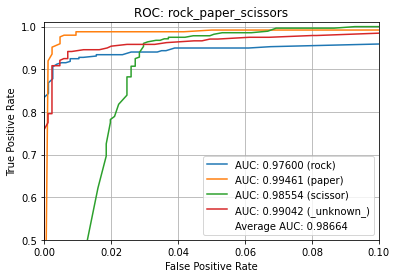

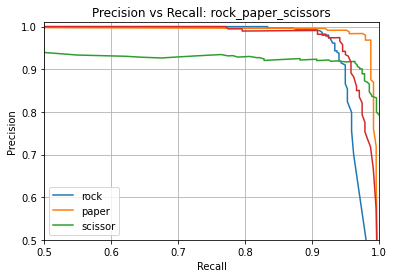

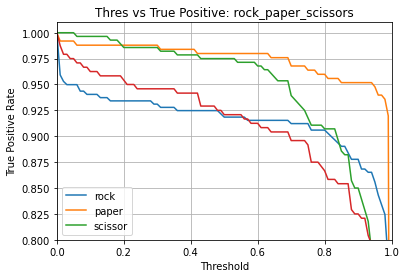

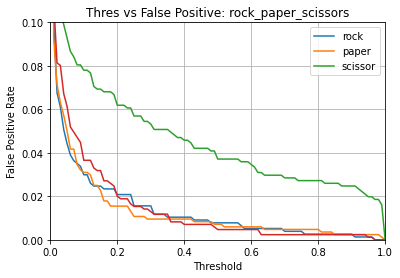

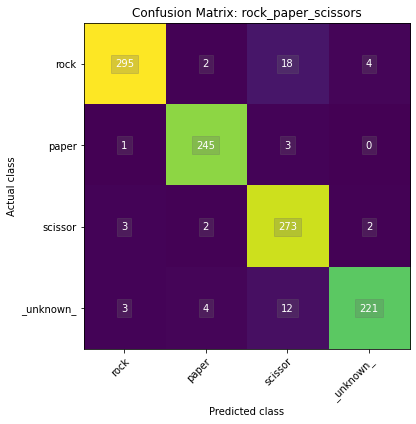

Name: rock_paper_scissors
Model Type: classification
Overall accuracy: 95.037%
Class accuracies:
- paper = 98.394%
- scissor = 97.500%
- rock = 92.476%
- _unknown_ = 92.083%
Average ROC AUC: 98.664%
Class ROC AUC:
- paper = 99.461%
- _unknown_ = 99.042%
- scissor = 98.554%
- rock = 97.600%



In [24]:
# For documentation purposes, we use the evaluate_model Python API so
# the evaluation plots are generated inline with the docs
from mltk.core import evaluate_model 
evaluation_results = evaluate_model('rock_paper_scissors', tflite=True, show=True)
print(f'{evaluation_results}')

So in this case, our model has a 95.0% overall accuracy.  

Once again, please refer to the [Model Evaluation Guide](https://siliconlabs.github.io/mltk/docs/guides/model_evaluation.html) for more details about the various metrics generated by this command.

### Note about model accuracy

The following are things to keep in mind to improve the model accuracy:  
- __Verify the dataset__ - Ensure all the samples are properly labeled and in a consistent format
- __Add more representative dataset__ - The more representative samples that are in the dataset, the better chance the model has at learning the important features in the samples
- __Increase the model size__ - Increase the model size by adding more or wider layers (e.g. add more Conv2D filers)

## Model Testing

__NOTE:__ This section is __experimental__ and is optional for the rest of this tutorial.
You may safely skip to the next section.

To help evaluate the model's performance on real hardware, the MLTK offers the command: `classify_image`. With this command, the trained model can be used to classify images captured by an embedded camera. The `classify_image` command features:  
- Support for executing a model on a supported embedded development board
- Support for dumping the captured images to the local PC
- Support for displaying capture image on the local PC in real-time
- Support for adjusting the detection threshold
- Support for viewing the model prediction results in real-time

__NOTE:__ The `classify_image` command must run locally. It will not work remotely (e.g. on Colab or remote SSH)

See the output of the command help for more details:

In [25]:
!mltk classify_image --help

Usage: mltk classify_image [OPTIONS] <model>

  Classify images detected by a camera connected to an embedded device.

  NOTE: A supported embedded device must be locally connected to use this
  command.

Arguments:
  <model>  On of the following:
           - MLTK model name 
           - Path to .tflite file
           - Path to model archive file (.mltk.zip)
           NOTE: The model must have been previously trained for image classification  [required]

Options:
  -a, --accelerator <name>        Name of accelerator to use while executing the audio classification ML model
  --port <port>                   Serial COM port of a locally connected embedded device.
                                  'If omitted, then attempt to automatically determine the serial COM port
  -v, --verbose                   Enable verbose console logs
  -w, --window_duration <duration ms>
                                  Controls the smoothing. Drop all inference results that are older than <now> minus win

To run this command with the trained model, issue the command:

```shell
# Run the image classifier with the trained model
# Use the MVP hardware accelerator
# Verbosely print the inference results
# Dump images to the local PC
# NOTE: This command must run from a local terminal
mltk classify_image rock_paper_scissors --accelerator MVP --verbose --dump-images
```

## Deploying the Model

Now that we have a trained model, it is time to run it in on an embedded device.

There are several different ways this can be done:


### Using the MLTK

The MLTK supports building [C++ Applications](https://siliconlabs.github.io/mltk/docs/cpp_development/index.html).

It also features an [image_classifier](https://siliconlabs.github.io/mltk/docs/cpp_development/examples/image_classifier.html) C++ application
which can be built using:  
- [Visual Studio Code](https://siliconlabs.github.io/mltk/docs/cpp_development/vscode.html) 
- [Simplicity Studio](https://siliconlabs.github.io/mltk/docs/cpp_development/simplicity_studio.html)
- [Command Line](https://siliconlabs.github.io/mltk/docs/cpp_development/command_line.html)

Refer to the [image_classifier](https://siliconlabs.github.io/mltk/docs/cpp_development/examples/image_classifier.html) application's documentation
for how include your model into the built application.